0
1
2


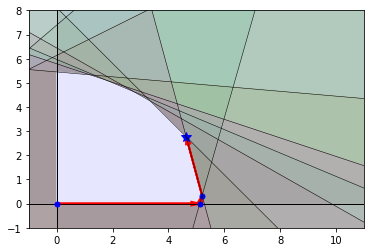

In [4]:
from numpy import *
import matplotlib
from matplotlib.pyplot import *
from matplotlib.colors import LogNorm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

close('all')


fig, ax = subplots()
patches = []
m = 10
n = 2

x0 = 4*random.rand()
y0 = 4*random.rand()
r  = 5
theta = (3.*random.rand(m)-1.)*pi/2.
x1 = x0 + r*cos(theta)
y1 = y0 + r*sin(theta)
A  = zeros(m*n).reshape(m,n)
A[:,0] = x1-x0
A[:,1] = y1-y0
b = (x1-x0)*x1 + (y1-y0)*y1
A = ceil(20*A)
b = ceil(20*b-0.5)
b = matrix(b)
b = b.T
c = matrix(ceil(9*random.rand(n,1)))



# code that avoids zeros in the A matrix...
#A  = 10*random.rand(m,n)-5  
#signA = sign(A)
#absA = ceil(abs(A))
#A  = signA*absA
#b = matrix(ceil(5*(1+random.rand(1,m))*mean(abs(A),axis=1)))
#b = b.T
#c = matrix(ceil(9*random.rand(n,1)))

# color in the feasible half-plane for each constraint
# x is positive
fill([0,0,120,120],[-120,120,120,-120],color=(0.1,0.2,0.3,0.1))
# y is positive
fill([-120,120,120,-120],[0,0,120,120],color=(0.3,0.2,0.1,0.1))
for i in range(m):
    xm = -120; ym = (b[i] - A[i,0]*xm)/A[i,1]; ym = ym[0,0]
    xp =  120; yp = (b[i] - A[i,0]*xp)/A[i,1]; yp = yp[0,0]
    if (A[i,0]*xm + A[i,1]*(ym+1) < b[i]): dy =  1200
    else:                                  dy = -1200
    facecolor = (1.0*i/m,1.0-1.0*i/m,abs(1.0-2.0*i/m),0.1)
    fill([xm,xp,xp,xm],[ym,yp,yp+dy,ym+dy],color=facecolor)

ax.plot([-120,120],[0,0],'k-',linewidth=1)
ax.plot([0,0],[-120,120],'k-',linewidth=1)
#ax.axis('equal')
xl = -1; yl = -1; width = 12
ax.set_xlim([xl, xl+width])
ax.set_ylim([yl, yl+3*width/4])


# here's the primal simplex algorithm
#
# Problem:    max c^T x
#             s.t. A  x <= b
#                     x >= 0
#
xx = zeros(1000);               # x coords of "vertices" visited
yy = zeros(1000);
nonbasics = arange(n)
basics = n + arange(m)
iter = 0
opt = 0
eps = 1e-10
AA = A
bb = b
cc = c
A = -A
while ( (max(c) > eps) ):
        print(iter)

        col = argmax(c)                 # find entering variable
        Acol = A[:,col].reshape(m,1)    # the associate entering column
        tmp = -Acol/b                   # vector of ratios
        row = argmax(tmp)               # the leaving variable
        j = nonbasics[col]              # the entering var's subscript
        i = basics[row]                 # the leaving var's subscript

        # update A matrix.  See section 5.4.
        Arow = A[row,:]                 # the row in A of the entering variable
        a = A[row,col]                  # the pivot element
        A = A - Acol*Arow/a             # the out-of-row/out-of-col update formula
        A[row,:] = -Arow/a              # update formula for the row
        A[:,col] = Acol.reshape(1,m)/a  # update formula for the col
        A[row,col] = 1/a                # update formula for the pivot element

        # update the right-hand side
        brow = b[row,0]
        b = b - brow*Acol/a
        b[row] = -brow/a

        # update the objective function
        ccol = c[col,0]
        c = c - ccol*(Arow.reshape(n,1))/a
        c[col] = ccol/a

        # swapping variables x_j and x_i position in the dictionary
        basics[row] = j         
        nonbasics[col] = i
        iter = iter+1

        for i in arange(m):
                if basics[i] == 0:
                        xx[iter] = b[i]
                if basics[i] == 1:
                        yy[iter] = b[i]

# find vertices of feasible polygon
done = False
vx = zeros(500)
vy = zeros(500)
vx[0] = xx[iter]
vy[0] = yy[iter]
numvert = 0
while ( done == False ):
        col = numvert%2
        Acol = A[:,col].reshape(m,1)
        tmp = -Acol/b
        row = argmax(tmp)
        j = nonbasics[col]
        i = basics[row]

        Arow = A[row,:]
        a = A[row,col]
        A = A - Acol*Arow/a
        A[row,:] = -Arow/a
        A[:,col] = Acol.reshape(1,m)/a
        A[row,col] = 1/a

        brow = b[row,0]
        b = b - brow*Acol/a
        b[row] = -brow/a

        ccol = c[col,0]
        c = c - ccol*(Arow.reshape(n,1))/a
        c[col] = ccol/a

        basics[row] = j
        nonbasics[col] = i
        numvert = numvert+1
        if (numvert > 50):
                print('too many vertices')
                break

        for i in arange(m):
                if basics[i] == 0:
                        vx[numvert] = b[i]
                if basics[i] == 1:
                        vy[numvert] = b[i]

        if ( (abs(vx[numvert]-vx[0])<eps) & (abs(vy[numvert]-vy[0])<eps) ):
                done = True

fill(vx[0:numvert+1],vy[0:numvert+1],color=(0.9,0.9,1.0,1.0))
plot(xx[0:iter+1],yy[0:iter+1],'r-',linewidth=1)
plot(xx[0:iter+1],yy[0:iter+1],'b.',markersize=10,linewidth=1)
plot(xx[iter],yy[iter],'b*',markersize=10)
for i in range(m):
    xm = -120; ym = (bb[i] - AA[i,0]*xm)/AA[i,1];  ym = ym[0,0]
    xp =  120; yp = (bb[i] - AA[i,0]*xp)/AA[i,1];  yp = yp[0,0]
    plot([xm, xp], [ym, yp], 'k', linewidth=0.5, alpha=1.0)
for i in range(iter):
    arrow(xx[i],yy[i],xx[i+1]-xx[i],yy[i+1]-yy[i],length_includes_head=True, \
                    lw=2,head_width=0.15,head_length=0.3,fc='r',ec='r') 
        
show()
